# Windturbine data from a SCADA system sampled every 10 minutes
---
You can find this dataset in [Kaggle](https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset)

**The variables are :**
- Active Power
- Wind Speed
- Theoretical Power
- Wind Direction




In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from empiricaldist import Pmf
import seaborn as sns

### We are going to import the data, rename some columns and make an new column named hours
---

In [2]:
# This has data for power generation by a wind turbine during 2018 every 10 minutes
df=pd.read_csv("T1.csv")
print(df.head())
print(df.shape)
print(df.dtypes)

Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286  
(50530, 5)
Date/Time                         object
LV ActivePower (kW)              float64
Wind Speed (m/s)                 float64
Theoretical_Power_Curve (KWh)    float64
Wind Direction (°)               float64
dtype: object


In [3]:
#Renaming the Columns for easier programming
##ap=LV Active Power
##ws=Wind Speed
##tp=theoretical Power
##wd=Wind Direction
df=df.rename(columns={'Date/Time':'date','LV ActivePower (kW)':'ap','Wind Speed (m/s)':'ws','Theoretical_Power_Curve (KWh)':'tp','Wind Direction (°)':'wd'})
print(df.head())

date          ap        ws          tp          wd
0  01 01 2018 00:00  380.047791  5.311336  416.328908  259.994904
1  01 01 2018 00:10  453.769196  5.672167  519.917511  268.641113
2  01 01 2018 00:20  306.376587  5.216037  390.900016  272.564789
3  01 01 2018 00:30  419.645905  5.659674  516.127569  271.258087
4  01 01 2018 00:40  380.650696  5.577941  491.702972  265.674286


In [4]:
#convert data to Integers
convert={'ap':int,'ws':int,'tp':int,'wd':int}
df[["ap","ws","tp","wd"]]=df[["ap","ws","tp","wd"]].astype(convert)

In [5]:
#convert Date to Datetime object
df["date"]=pd.to_datetime(df['date'],format='%d %m %Y %H:%M')

In [6]:
#Find missing values
df.isna().any() 

date    False
ap      False
ws      False
tp      False
wd      False
dtype: bool

In [7]:
#Create a new column named "hours" with only the hours, not dates
df["hours"]=df['date'].dt.strftime("%H:%M")


In [8]:
#Let explore variables

In [9]:
df['ap'].describe()

count    50530.000000
mean      1307.291649
std       1312.350656
min         -2.000000
25%         50.000000
50%        825.000000
75%       2482.000000
max       3618.000000
Name: ap, dtype: float64

## Variable Analysis
---

#### Histogram from  Active Power
Just from the histogram we can se that there is no normal distribution as we have a peak betwen 0 to 500 and anoter around 3000 to 3500

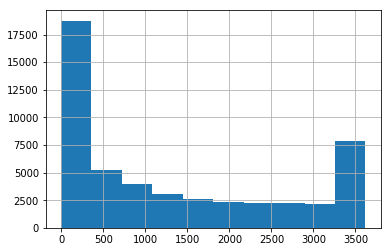

In [10]:

df['ap'].hist()

In [ ]:
#Lets explore more in dept values on the range of 0 to 1000 kw
The count is  around half all the sampled data every 10 minutes.
and we see that 25% of the time is not producing electricity

count    27146.000000
mean       246.007478
std        302.061049
min         -2.000000
25%          0.000000
50%         88.000000
75%        455.000000
max       1000.000000
Name: ap, dtype: float64


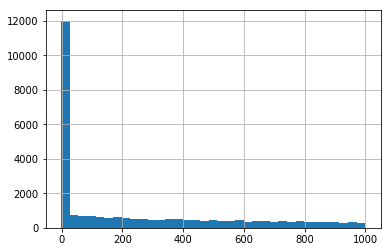

In [43]:
range_1000=df[df['ap']<=1000]
print(range_1000['ap'].describe())
range_1000['ap'].hist(bins=35)

In [ ]:
#So we have 10943 times where the turbine was not generating any power
#this equals 1823 hours that is not producing
#A year has 8766 hours
# 20% of he time the wind turbine was not producing any power.


In [41]:
producing0=df[df['ap']==0]
print(producing0['ap'].value_counts())

0    10943
Name: ap, dtype: int64


In [ ]:
#I think now I would like to know if there is any relationship between at what time during the day, the turbine is no producing any power

In [52]:
zero_hours=producing0['hours'].value_counts()

In [62]:
zero_hours=zero_hours.sort_index()

In [19]:
df['ws'].describe()

count    50530.000000
mean         7.058342
std          4.236638
min          0.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         25.000000
Name: ws, dtype: float64

In [ ]:
###Wind Speed Variable
we se a constant distribution between the 0 and 15 m/s. and a peak around  5 to 7 ms.
The mean is 7 m/s 

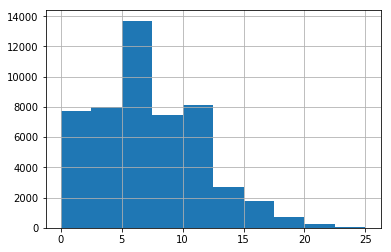

In [20]:
df['ws'].hist()

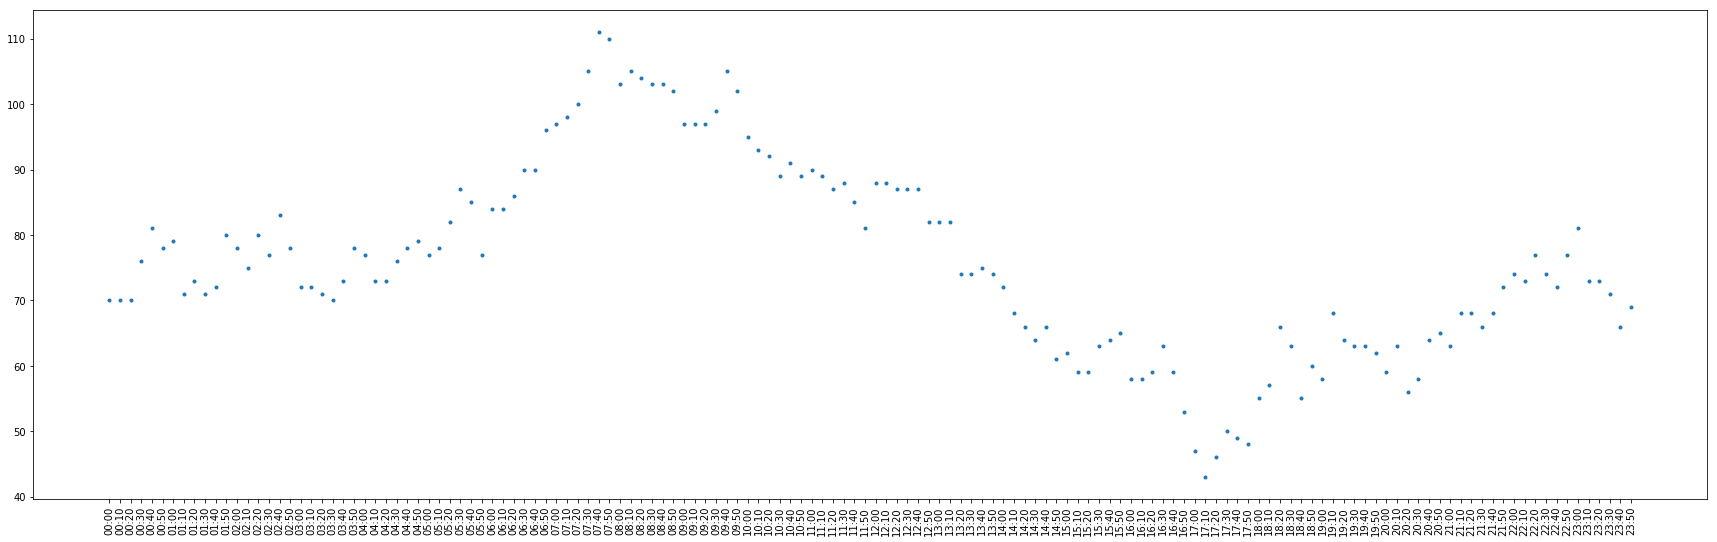

In [64]:
fig, ax=plt.subplots()
ax.plot(zero_hours.index,zero_hours,'o',markersize=3)
plt.xticks(rotation=90)
fig.set_size_inches([30,9])
fig.savefig("x.jpg", quality=80)

plt.show()

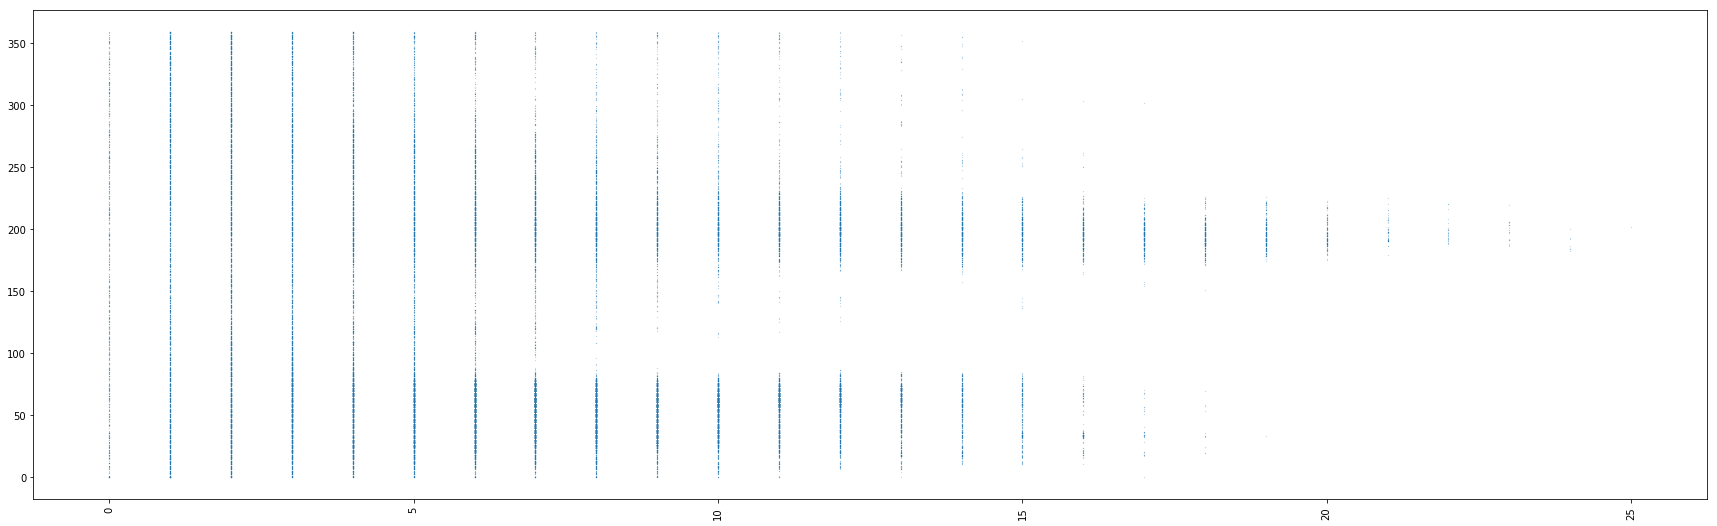

In [71]:
fig, ax=plt.subplots()
ax.plot(df['ws'],df['wd'],'o',markersize=.1)
plt.xticks(rotation=90)
fig.set_size_inches([30,9])
fig.savefig("x.jpg", quality=80)

plt.show()

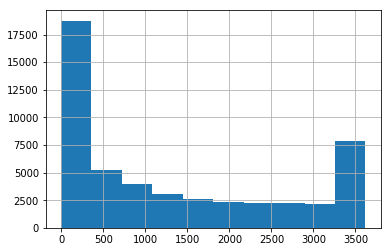

In [12]:
df['ap'].hist()